In [1]:
# Installing the required library
!pip install kagglehub

In [2]:
# Downloading the data
import kagglehub
path = kagglehub.dataset_download("alessiocorrado99/animals10")
print('Path to dataset files :', path)

Using Colab cache for faster access to the 'animals10' dataset.
Path to dataset files : /kaggle/input/animals10


In [3]:
# Step 1 : Importing important libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import random

In [4]:
# Step 2 : Define the dataset
DATA_DIR = "/kaggle/input/animals10"
train_path = os.path.join(DATA_DIR, "Train")
test_path = os.path.join(DATA_DIR, "Test")

In [7]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder(root="/kaggle/input/animals10/raw-img/", transform=transform)

train_ratio = 0.8
train_size = int(len(dataset) * train_ratio)
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Classes: {dataset.classes}")
print(f"Train size: {len(train_dataset)}, Test size: {len(test_dataset)}")

Classes: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Train size: 20943, Test size: 5236


In [6]:
# Specifying the parameters
IMG_SIZE = (64, 64)
BATCH_SIZE = 32

torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


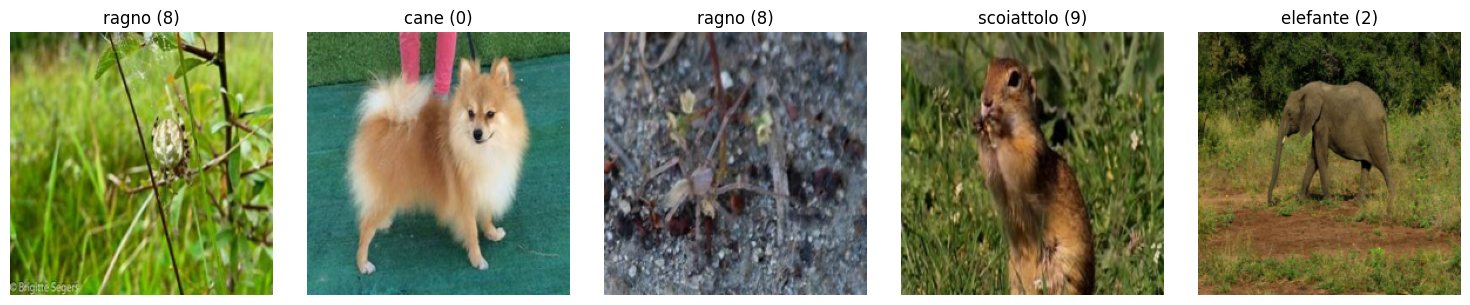

In [8]:
def show_random_sample(dataset, class_name, num_samples=5):
    indices = random.sample(range(len(dataset)), num_samples)
    plt.figure(figsize=(15, 3))

    for i, idx in enumerate(indices):
        image, label = dataset[idx]

        print(image.size())

        if isinstance(image, torch.Tensor):
            image = image.permute(1, 2, 0).numpy()

        plt.subplot(1, num_samples, i+1)
        plt.imshow(image)
        plt.title(f"{class_name[label]} ({label})")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

class_name = dataset.classes
show_random_sample(dataset=dataset, class_name=class_name, num_samples=5)

In [9]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=2, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=2, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=2, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=2, padding=1)

        self.relu = nn.ReLU()
        self.maxPool = nn.MaxPool2d(kernel_size=2)
        self.dropout = nn.Dropout(p=0.3)
        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(in_features=256 * 14 * 14, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=10)


    def forward(self, x):
        x = self.maxPool(self.relu(self.conv1(x)))
        x = self.maxPool(self.relu(self.conv2(x)))
        x = self.maxPool(self.relu(self.conv3(x)))
        x = self.maxPool(self.relu(self.conv4(x)))
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [10]:
model = CNN()
model

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (maxPool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.3, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=50176, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device=device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(), lr=1e-3)

In [12]:
def trainModel(model, dataloader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        train_loss = 0
        for images, labels in dataloader:
            images, labels = images.to(device=device), labels.to(device=device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        print(f"Epoch: {epoch+1}/{epochs}, Loss: {train_loss/len(dataloader)}")

trainModel(model=model, dataloader=train_loader, criterion=criterion, optimizer=optimizer)

Epoch: 1/10, Loss: 1.836565274318666
Epoch: 2/10, Loss: 1.4742584414154518
Epoch: 3/10, Loss: 1.2540212465606573
Epoch: 4/10, Loss: 1.0851208144471844
Epoch: 5/10, Loss: 0.9486709907764697
Epoch: 6/10, Loss: 0.8369743687960938
Epoch: 7/10, Loss: 0.723678860955566
Epoch: 8/10, Loss: 0.6231857976840652
Epoch: 9/10, Loss: 0.535694232059799
Epoch: 10/10, Loss: 0.47365067669453514


In [13]:
def testModel(model, dataloader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for image, label in dataloader:
            image, label = image.to(device=device), label.to(device=device)

            output = model(image)
            loss = criterion(output, label)
            test_loss += loss.item()
            _, predict = torch.max(output, 1)
            correct += (predict == label).sum().item()
            total += label.size(0)

    avg_loss = test_loss / len(dataloader)
    accuracy = 100 * correct / total

    print(f"Validation loss: {avg_loss:.4f}, Validation accuracy: {accuracy:.2f}%")

testModel(model=model, dataloader=test_loader, criterion=criterion)

Validation loss: 1.4198, Validation accuracy: 63.71%


In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device=device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(), lr=1e-3)


NameError: name 'avg_loss' is not defined

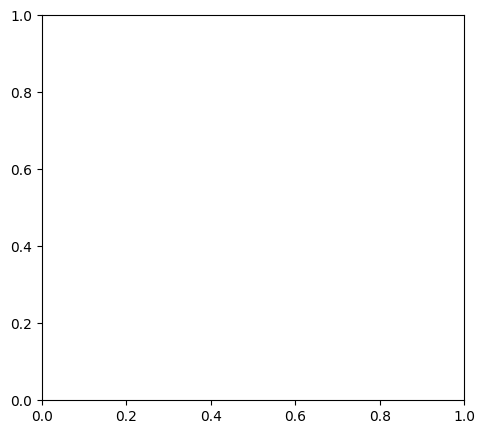

In [16]:
# ===========================
# 4. Plot Training Curves
# ===========================
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(avg_loss, label='Train Loss')
plt.plot(accuracy, label='Val Loss')
plt.title("Loss Curves")
plt.legend()

In [ ]:

plt.subplot(1,2,2)
plt.plot(train_acc, label='Train Acc')
plt.plot(val_acc, label='Val Acc')
plt.title("Accuracy Curves")
plt.legend()

plt.show()

In [17]:

# ===========================
# 5. Confusion Matrix & Report
# ===========================
y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=train_data.classes))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_data.classes, yticklabels=train_data.classes)
plt.title("Confusion Matrix")
plt.show()

# ===========================
# 6. Show Example Predictions
# ===========================
def imshow(img, title):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis("off")
    plt.show()

dataiter = iter(val_loader)
images, labels = next(dataiter)
outputs = model(images.to(device))
_, predicted = outputs.max(1)

for i in range(5):  # show 5 predictions
    imshow(images[i], f"True: {train_data.classes[labels[i]]}, Pred: {train_data.classes[predicted[i]]}")

# ===========================
# 7. Misclassified Examples
# ===========================
misclassified = [(img, l, p) for img, l, p in zip(images, labels, predicted.cpu()) if l != p]
for i in range(min(5, len(misclassified))):
    img, true_label, pred_label = misclassified[i]
    imshow(img, f"Misclassified | True: {train_data.classes[true_label]}, Pred: {train_data.classes[pred_label]}")

NameError: name 'val_loader' is not defined

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 127MB/s]


Epoch 1: Train Acc=75.45%, Val Acc=80.21%
Epoch 2: Train Acc=84.59%, Val Acc=82.79%
Epoch 3: Train Acc=88.64%, Val Acc=78.11%
Epoch 4: Train Acc=91.46%, Val Acc=83.10%
Epoch 5: Train Acc=93.05%, Val Acc=85.71%


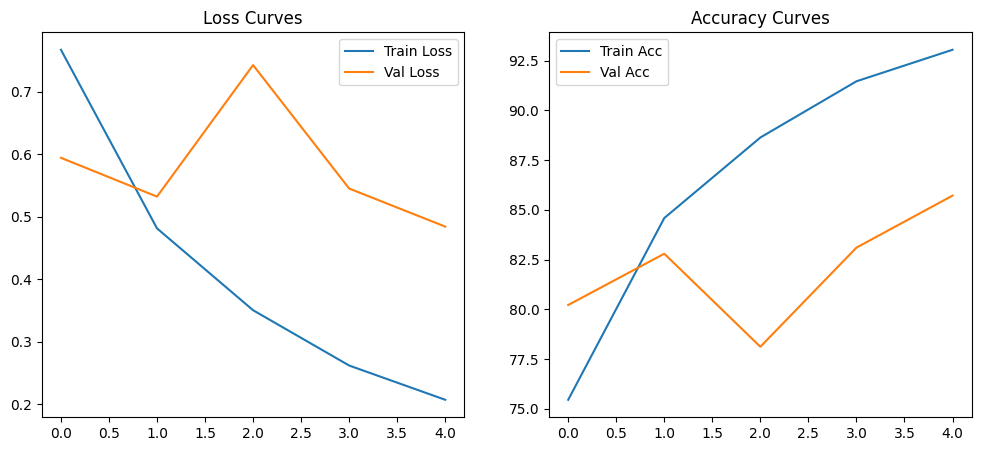


Classification Report:
               precision    recall  f1-score   support

        cane       0.85      0.89      0.87      1000
     cavallo       0.91      0.79      0.85       524
    elefante       0.73      0.93      0.82       301
    farfalla       0.95      0.83      0.89       436
     gallina       0.95      0.84      0.89       643
       gatto       0.78      0.85      0.81       323
       mucca       0.85      0.74      0.79       375
      pecora       0.66      0.83      0.73       340
       ragno       0.93      0.92      0.92       952
  scoiattolo       0.84      0.85      0.84       342

    accuracy                           0.86      5236
   macro avg       0.84      0.85      0.84      5236
weighted avg       0.87      0.86      0.86      5236



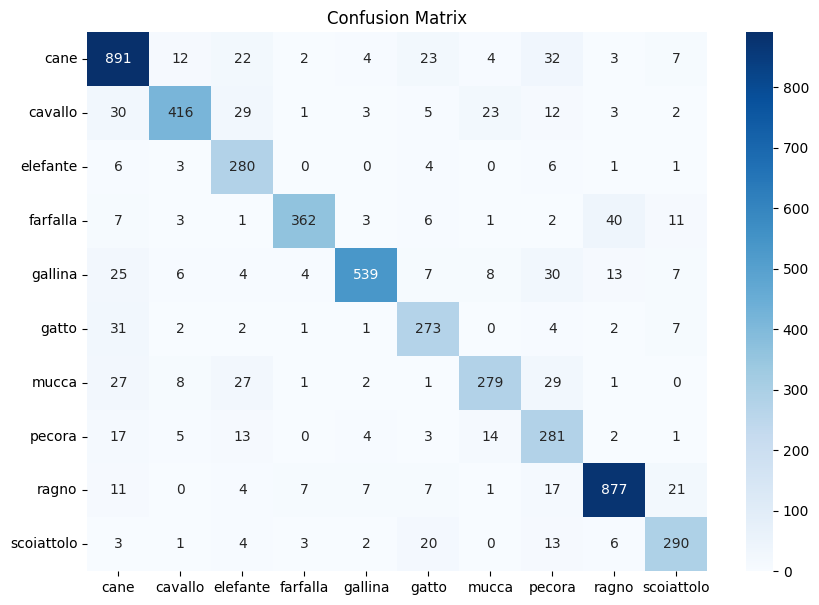

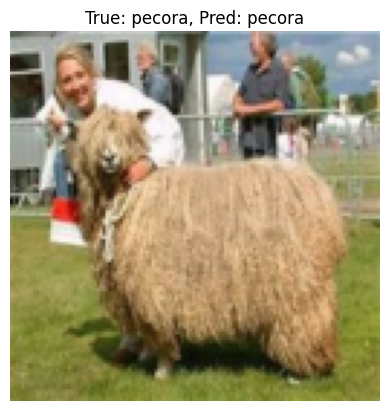

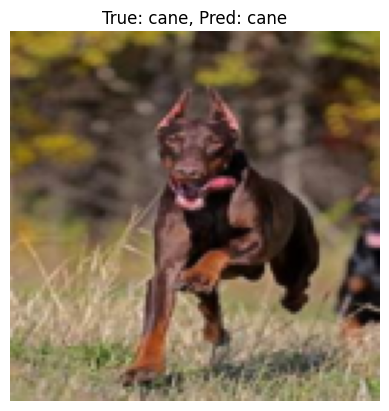

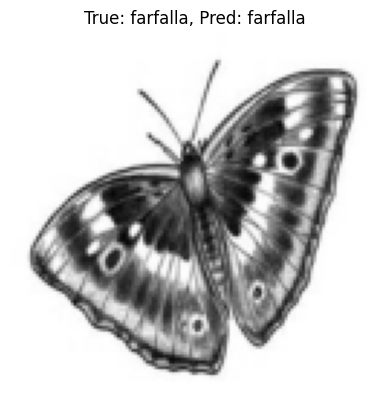

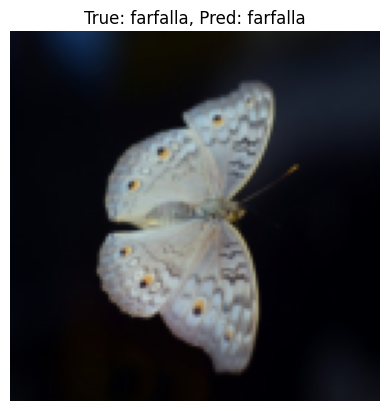

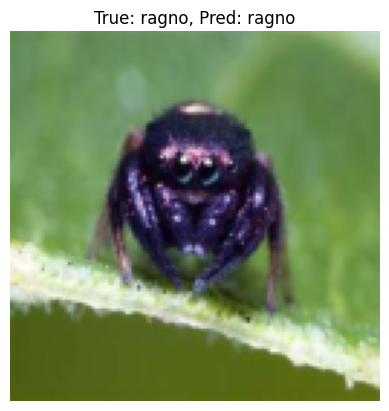

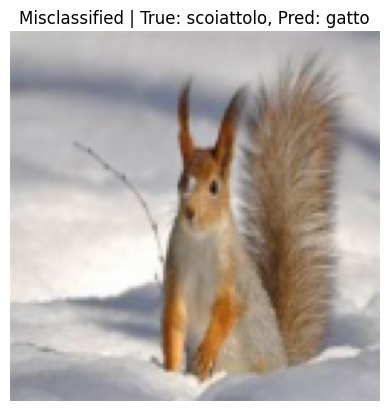

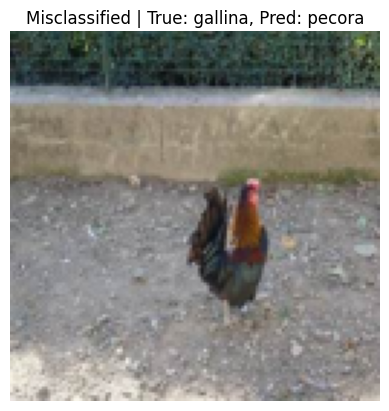

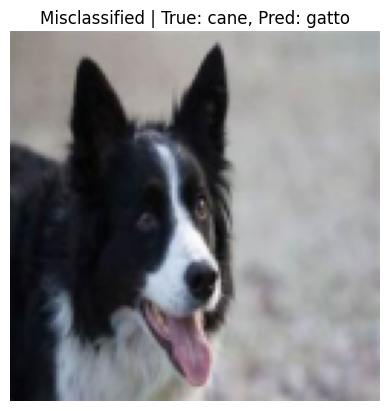

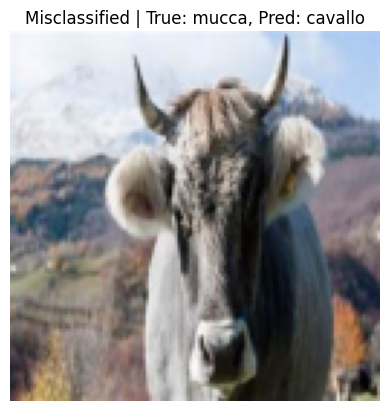

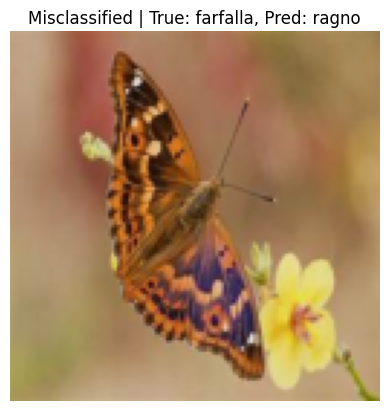

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ===========================
# 1. Data Preprocessing
# ===========================
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])
])
train_data = datasets.ImageFolder(root="/kaggle/input/animals10/raw-img/", transform=transform)
#train_data = datasets.ImageFolder("animals10/raw-img", transform=transform)
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size

train_dataset, val_dataset = torch.utils.data.random_split(train_data, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# ===========================
# 2. Model (Transfer Learning)
# ===========================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(train_data.classes))  # 10 classes
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ===========================
# 3. Training Loop
# ===========================
train_loss, val_loss, train_acc, val_acc = [], [], [], []

for epoch in range(5):  # adjust epochs
    model.train()
    running_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)

    train_loss.append(running_loss / len(train_loader))
    train_acc.append(100 * correct / total)

    # Validation
    model.eval()
    val_running_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item()
            _, predicted = outputs.max(1)
            val_correct += predicted.eq(labels).sum().item()
            val_total += labels.size(0)

    val_loss.append(val_running_loss / len(val_loader))
    val_acc.append(100 * val_correct / val_total)

    print(f"Epoch {epoch+1}: Train Acc={train_acc[-1]:.2f}%, Val Acc={val_acc[-1]:.2f}%")


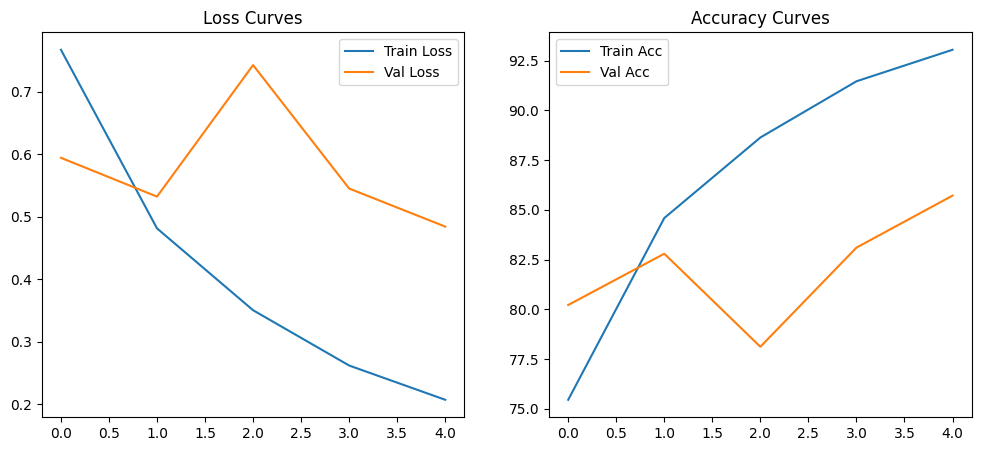

In [20]:

# ===========================
# 4. Plot Training Curves
# ===========================
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title("Loss Curves")
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_acc, label='Train Acc')
plt.plot(val_acc, label='Val Acc')
plt.title("Accuracy Curves")
plt.legend()

plt.show()


🔹 **Loss Curves**

Training Loss: Decreases steadily across epochs → the model is learning well on training data.

Validation Loss: Decreases initially but then spikes around epoch 2, before slightly dropping again.

This suggests overfitting: the model is memorizing training data while struggling on unseen validation data.

🔹 **Accuracy Curves**

Training Accuracy: Increases consistently from ~75% → ~93%.

Validation Accuracy: Improves early on (~80% → 83%), then dips around epoch 2, and recovers slightly to ~85%.

The gap between training (93%) and validation (85%) indicates generalization issues (classic overfitting).


Classification Report:
               precision    recall  f1-score   support

        cane       0.85      0.89      0.87      1000
     cavallo       0.91      0.79      0.85       524
    elefante       0.73      0.93      0.82       301
    farfalla       0.95      0.83      0.89       436
     gallina       0.95      0.84      0.89       643
       gatto       0.78      0.85      0.81       323
       mucca       0.85      0.74      0.79       375
      pecora       0.66      0.83      0.73       340
       ragno       0.93      0.92      0.92       952
  scoiattolo       0.84      0.85      0.84       342

    accuracy                           0.86      5236
   macro avg       0.84      0.85      0.84      5236
weighted avg       0.87      0.86      0.86      5236



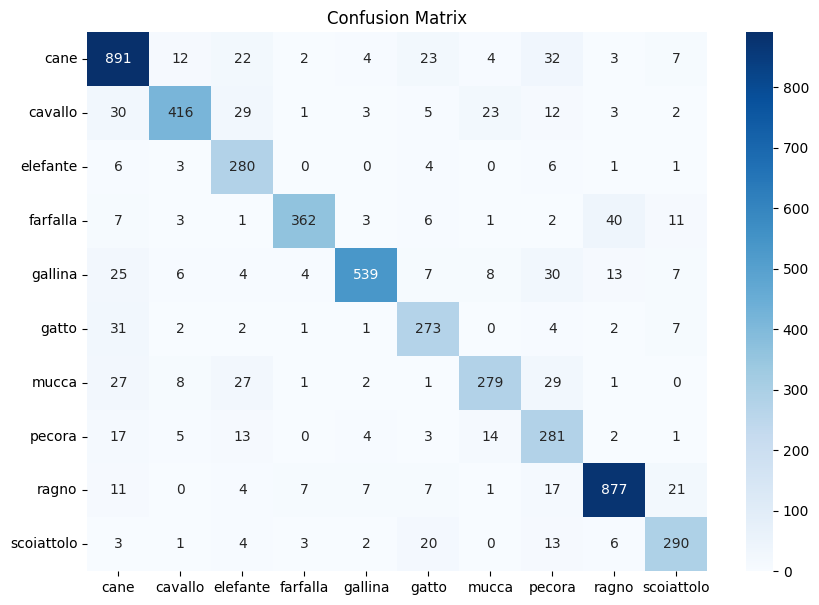

In [21]:

# ===========================
# 5. Confusion Matrix & Report
# ===========================
y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=train_data.classes))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_data.classes, yticklabels=train_data.classes)
plt.title("Confusion Matrix")
plt.show()


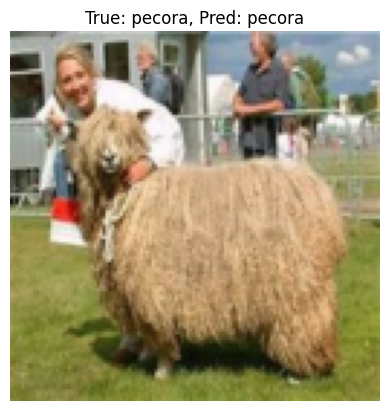

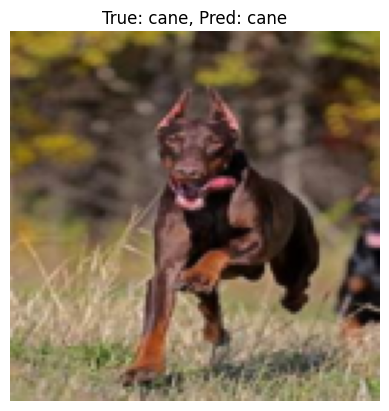

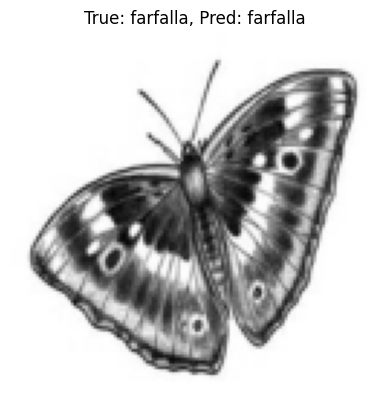

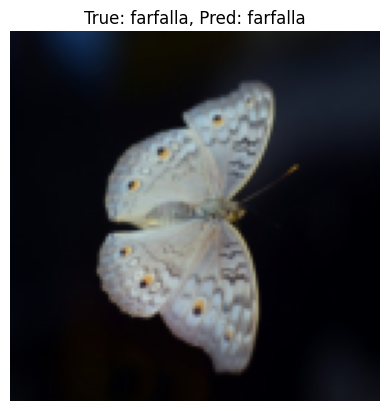

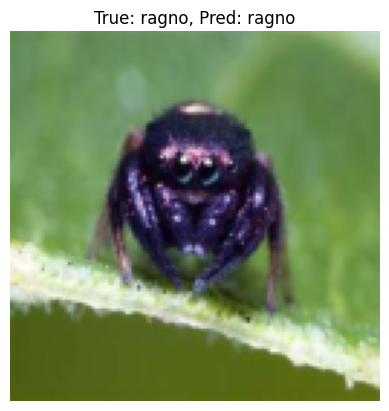

In [22]:

# ===========================
# 6. Show Example Predictions
# ===========================
def imshow(img, title):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis("off")
    plt.show()

dataiter = iter(val_loader)
images, labels = next(dataiter)
outputs = model(images.to(device))
_, predicted = outputs.max(1)

for i in range(5):  # show 5 predictions
    imshow(images[i], f"True: {train_data.classes[labels[i]]}, Pred: {train_data.classes[predicted[i]]}")


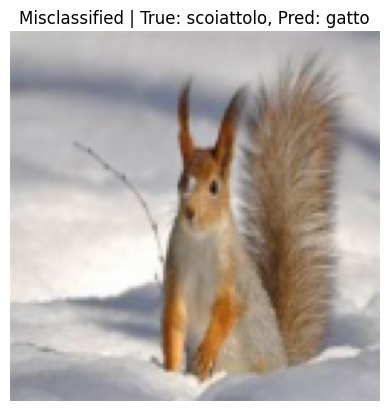

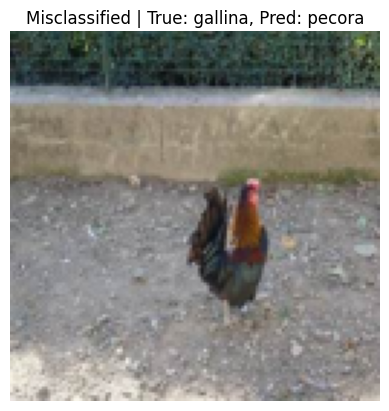

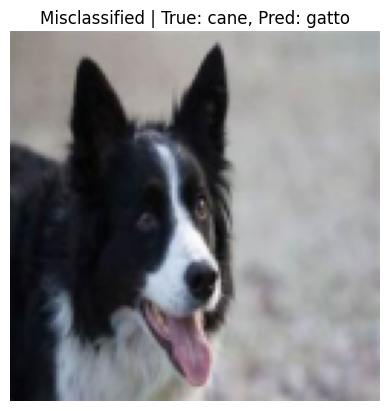

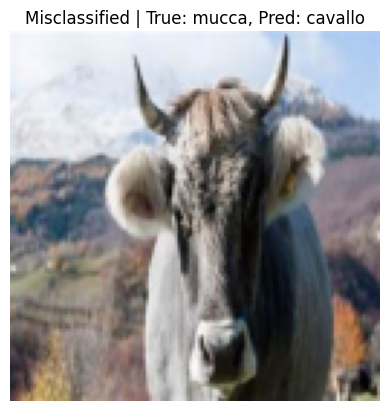

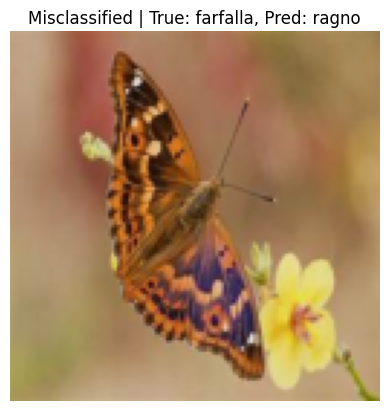

In [23]:

# ===========================
# 7. Misclassified Examples
# ===========================
misclassified = [(img, l, p) for img, l, p in zip(images, labels, predicted.cpu()) if l != p]
for i in range(min(5, len(misclassified))):
    img, true_label, pred_label = misclassified[i]
    imshow(img, f"Misclassified | True: {train_data.classes[true_label]}, Pred: {train_data.classes[pred_label]}")

In [26]:
# ===========================
# 2. Model with Dropout
# ===========================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)

# Replace FC layer with Dropout + Linear
model.fc = nn.Sequential(
    nn.Dropout(0.4),  # Dropout layer
    nn.Linear(model.fc.in_features, len(dataset.classes))
)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5)

In [27]:
# ===========================
# 3. Training with Early Stopping
# ===========================
def train_model(model, train_loader, val_loader, epochs=20, patience=3):
    best_val_loss = float("inf")
    patience_counter = 0

    train_loss, val_loss, train_acc, val_acc = [], [], [], []

    for epoch in range(epochs):
        # Training phase
        model.train()
        running_loss, correct, total = 0, 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)

        epoch_train_loss = running_loss / len(train_loader)
        epoch_train_acc = 100 * correct / total
        train_loss.append(epoch_train_loss)
        train_acc.append(epoch_train_acc)

        # Validation phase
        model.eval()
        val_running_loss, val_correct, val_total = 0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item()
                _, predicted = outputs.max(1)
                val_correct += predicted.eq(labels).sum().item()
                val_total += labels.size(0)

        epoch_val_loss = val_running_loss / len(val_loader)
        epoch_val_acc = 100 * val_correct / val_total
        val_loss.append(epoch_val_loss)
        val_acc.append(epoch_val_acc)

        scheduler.step(epoch_val_loss)  # adjust LR if val loss plateaus

        print(f"Epoch {epoch+1}: Train Loss={epoch_train_loss:.3f}, Train Acc={epoch_train_acc:.2f}%, "
              f"Val Loss={epoch_val_loss:.3f}, Val Acc={epoch_val_acc:.2f}%")

        # Early Stopping
        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            patience_counter = 0
            torch.save(model.state_dict(), "best_model.pth")
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered")
                break

    return train_loss, val_loss, train_acc, val_acc

In [28]:
# ===========================
# 4. Run Training
# ===========================
train_loss, val_loss, train_acc, val_acc = train_model(model, train_loader, val_loader, epochs=20, patience=3)

Epoch 1: Train Loss=0.813, Train Acc=73.98%, Val Loss=0.702, Val Acc=77.23%
Epoch 2: Train Loss=0.498, Train Acc=84.06%, Val Loss=0.572, Val Acc=81.70%
Epoch 3: Train Loss=0.363, Train Acc=88.52%, Val Loss=0.560, Val Acc=82.47%
Epoch 4: Train Loss=0.285, Train Acc=91.02%, Val Loss=0.507, Val Acc=84.78%
Epoch 5: Train Loss=0.227, Train Acc=92.76%, Val Loss=0.506, Val Acc=85.52%
Epoch 6: Train Loss=0.189, Train Acc=93.77%, Val Loss=0.538, Val Acc=84.26%
Epoch 7: Train Loss=0.149, Train Acc=95.12%, Val Loss=0.546, Val Acc=86.31%
Epoch 8: Train Loss=0.132, Train Acc=95.80%, Val Loss=0.598, Val Acc=84.17%
Early stopping triggered


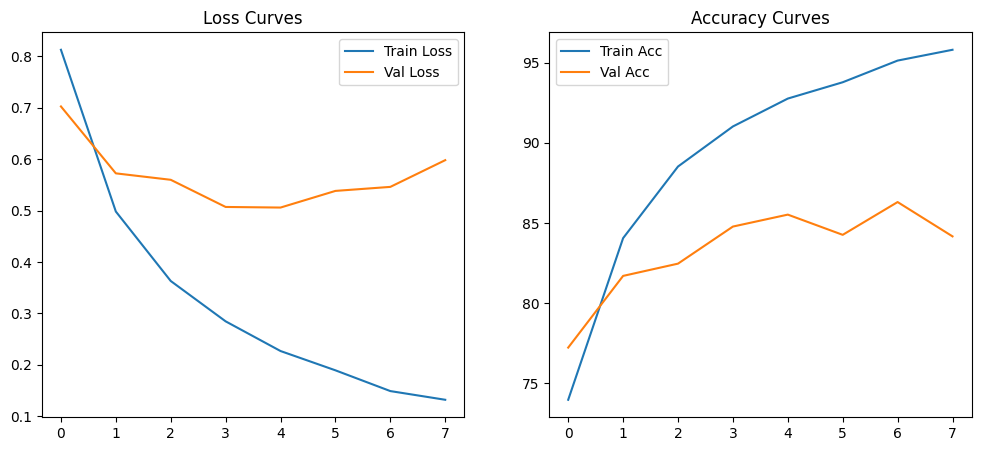

In [29]:
# ===========================
# 5. Plot Curves
# ===========================
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Val Loss")
plt.title("Loss Curves")
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_acc, label="Train Acc")
plt.plot(val_acc, label="Val Acc")
plt.title("Accuracy Curves")
plt.legend()

plt.show()

🔹 **Loss Curves**

Training Loss continues to drop smoothly (0.8 → 0.12).

Validation Loss decreased initially (0.7 → 0.5), then flattened around epoch 3–4, and slightly increased afterward.

This indicates mild overfitting, but less severe than before.


🔹 ***Accuracy Curves***

Training Accuracy improved steadily (74% → 96%).

Validation Accuracy improved until ~epoch 3–4 (~85%), then oscillated around 84–86%.

The gap between train (96%) and val (85%) shows overfitting still exists, but it’s controlled compared to before.

Early stopping around epoch 3–4 might give the best generalization.


🔹 **Key Insights**

Model is better than before → Validation accuracy improved and stabilized.

Best epoch ≈ 3–4 → After that, validation doesn’t improve much.

Still some overfitting gap (~10–12%), but regularization helped.

Likely causes:

Dataset imbalance (some animals have fewer images).

Classes that look visually similar (e.g., dog vs wolf, horse vs deer).


👉 ***Next Steps for Deeper Evaluation:***

Plot per-class accuracy → see which animals are hardest.

Visualize confusion matrix → see which pairs are most confused.

Show misclassified examples → understand why the model fails.

In [31]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# ===========================
# 1. Collect predictions
# ===========================
y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
classes = train_dataset.dataset.classes  # class names


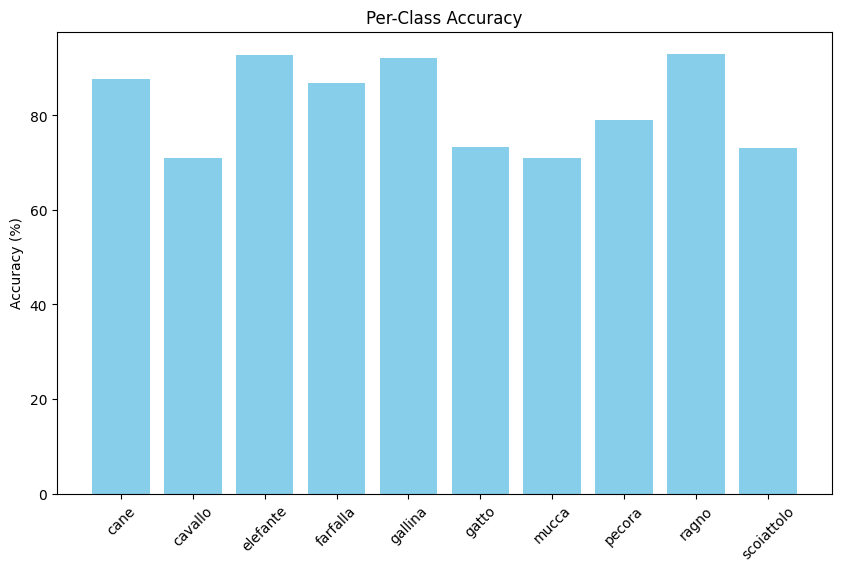

In [32]:
# ===========================
# 2. Per-Class Accuracy
# ===========================
class_correct = {cls:0 for cls in classes}
class_total = {cls:0 for cls in classes}

for true, pred in zip(y_true, y_pred):
    class_total[classes[true]] += 1
    if true == pred:
        class_correct[classes[true]] += 1

class_accuracy = {cls: 100 * class_correct[cls] / class_total[cls] for cls in classes}

# Bar plot
plt.figure(figsize=(10,6))
plt.bar(class_accuracy.keys(), class_accuracy.values(), color="skyblue")
plt.xticks(rotation=45)
plt.ylabel("Accuracy (%)")
plt.title("Per-Class Accuracy")
plt.show()


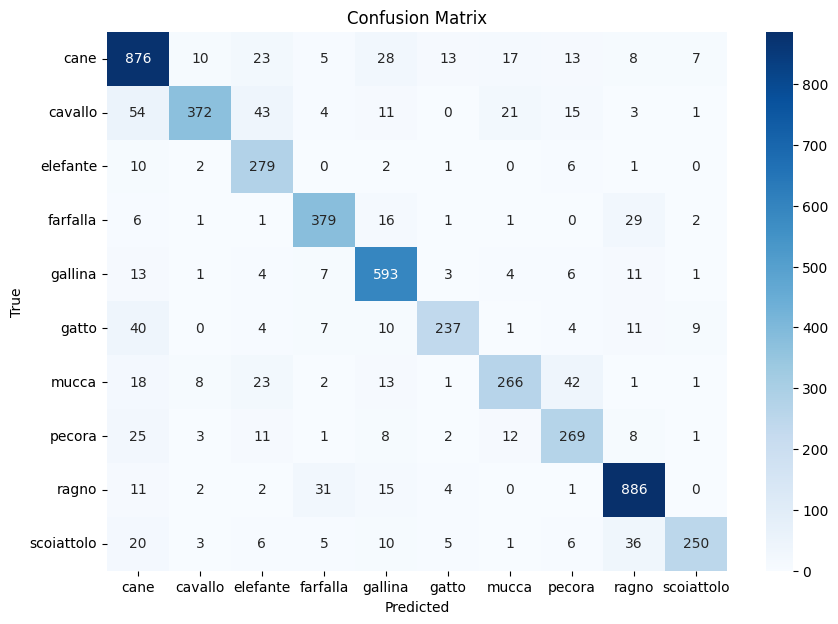


Classification Report:
               precision    recall  f1-score   support

        cane       0.82      0.88      0.85      1000
     cavallo       0.93      0.71      0.80       524
    elefante       0.70      0.93      0.80       301
    farfalla       0.86      0.87      0.86       436
     gallina       0.84      0.92      0.88       643
       gatto       0.89      0.73      0.80       323
       mucca       0.82      0.71      0.76       375
      pecora       0.74      0.79      0.77       340
       ragno       0.89      0.93      0.91       952
  scoiattolo       0.92      0.73      0.81       342

    accuracy                           0.84      5236
   macro avg       0.84      0.82      0.82      5236
weighted avg       0.85      0.84      0.84      5236



In [33]:

# ===========================
# 3. Confusion Matrix
# ===========================
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=classes))


In [34]:

# ===========================
# 4. Misclassified Samples
# ===========================
def imshow(img, title):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis("off")
    plt.show()

misclassified_indices = np.where(y_true != y_pred)[0]
print(f"Total misclassified samples: {len(misclassified_indices)}")


Total misclassified samples: 829


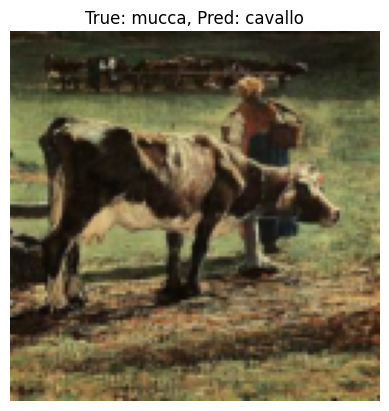

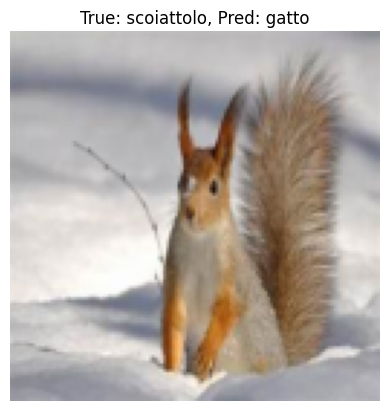

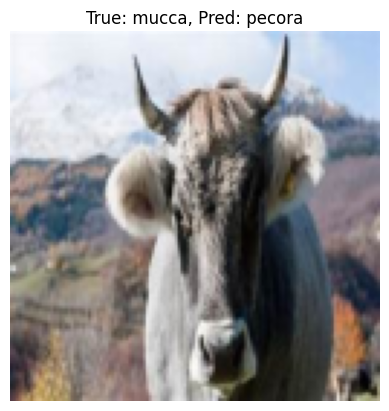

In [35]:

# Show 5 misclassified examples
dataiter = iter(val_loader)
images, labels = next(dataiter)
outputs = model(images.to(device))
_, predicted = outputs.max(1)

count = 0
for i in range(len(labels)):
    if labels[i] != predicted[i] and count < 5:
        imshow(images[i], f"True: {classes[labels[i]]}, Pred: {classes[predicted[i]]}")
        count += 1